Author: Mohona Yesmin

## Model: Random Forest - Binary Classification - Opioid-Related Deaths

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import resample

import seaborn as sns

In [4]:
data = pd.read_csv('data/df_with_topics.csv') 

In [5]:
# Feature Engineering: Extract day of the week, month, and year from date columns
data['date_of_incident'] = pd.to_datetime(data['date_of_incident'])
data['date_of_death'] = pd.to_datetime(data['date_of_death'])

data['day_of_week_incident'] = data['date_of_incident'].dt.day_name()
data['month_incident'] = data['date_of_incident'].dt.month
data['year_incident'] = data['date_of_incident'].dt.year

data['day_of_week_death'] = data['date_of_death'].dt.day_name()
data['month_death'] = data['date_of_death'].dt.month
data['year_death'] = data['date_of_death'].dt.year

In [6]:
categorical_cols = ['gender', 'race', 'manner_of_death']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [7]:
# Save the modified dataset
data.to_csv('modified_dataset.csv', index=False) 

In [8]:
print(data.columns)

Index(['date_of_incident', 'date_of_death', 'age', 'latino', 'primary_cause',
       'primary_cause_line_a', 'primary_cause_line_b', 'primary_cause_line_c',
       'secondary_cause', 'gun_related', 'opioid_related', 'cold_related',
       'heat_related', 'commissioner_district', 'incident_city',
       'incident_zip_code', 'longitude', 'latitude', 'residence_city',
       'residence_zip', 'chicago_community_area', 'covid_related', 'age_range',
       'death_date', 'death_time', 'death_day', 'inc_date', 'inc_time',
       'inc_day', 'long_topic', 'best_topic_num', 'best_topic_name',
       'best_topic_perc', 'day_of_week_incident', 'month_incident',
       'year_incident', 'day_of_week_death', 'month_death', 'year_death',
       'gender_1', 'race_Asian', 'race_Black', 'race_Other', 'race_Unknown',
       'race_White', 'manner_of_death_HOMICIDE', 'manner_of_death_SUICIDE'],
      dtype='object')


### Binary Classification - Opioid-Related Deaths

In [9]:
# Define features and target variable
features = ['age', 'latino', 'gun_related', 'cold_related', 'heat_related', 'covid_related', 'gender_1', 'race_Asian', 'race_Black', 'race_Other', 'race_Unknown', 'race_White', 'manner_of_death_HOMICIDE', 'manner_of_death_SUICIDE']
X = data[features]
y = data['opioid_related']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Address class imbalance using RandomOverSampler from scikit-learn
X_train_resampled, y_train_resampled = resample(X_train, y_train, random_state=42)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [13]:
# Build a Random Forest classifier with optimized hyperparameters
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [14]:
# Predict opioid-related deaths on the test set
y_pred = model.predict(X_test)

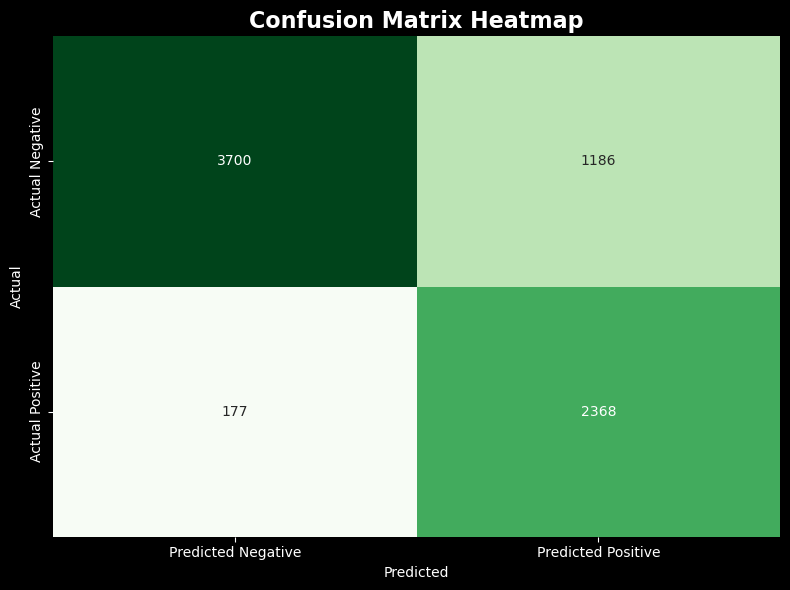

In [17]:
# Create a heatmap for the confusion matrix with similar style
plt.figure(figsize=(8, 6), facecolor='black')
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
                      xticklabels=['Predicted Negative', 'Predicted Positive'],
                      yticklabels=['Actual Negative', 'Actual Positive'], annot_kws={'fontsize': 10})

plt.xlabel('Predicted', color='white')
plt.ylabel('Actual', color='white')
plt.title('Confusion Matrix Heatmap', color='white', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', colors='white')

# Set the background color
plt.gca().set_facecolor('black')

# Show the plot
plt.tight_layout()
plt.show()


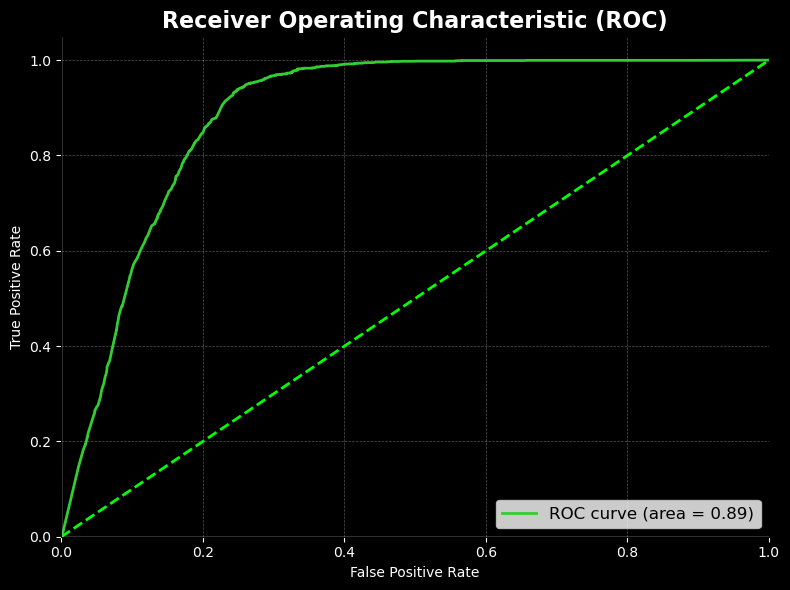

ROC AUC Score: 0.89
Confusion Matrix:
[[3700 1186]
 [ 177 2368]]


In [43]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the ROC curve with surrounding lines
plt.figure(figsize=(8, 6), facecolor='black')
plt.plot(fpr, tpr, color='limegreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='lime', lw=2, linestyle='--')

# Add lines for x and y axes
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color='white')
plt.ylabel('True Positive Rate', color='white')
plt.title('Receiver Operating Characteristic (ROC)', color='white', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.tick_params(axis='both', colors='white')

# Set the background color and add a subtle grid
plt.gca().set_facecolor('black')
plt.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print the ROC AUC score and confusion matrix
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


In [21]:
# Evaluate the model's accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      4886
           1       0.67      0.93      0.78      2545

    accuracy                           0.82      7431
   macro avg       0.81      0.84      0.81      7431
weighted avg       0.86      0.82      0.82      7431

